In [197]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
import statsmodels.api as sm

## Chapter 1 Load the data

In [244]:
submission=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\big-mart-sales-prediction\Submission.csv')
train=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\big-mart-sales-prediction\train.csv')

In [245]:
display(submission.head())
display(train.head(100))

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### CHAPTER 2 Explore the data

In [246]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [247]:
def data_modified(df,pred=None):
    obs=df.shape[0] # return the number of rows
    types=df.dtypes #return the type of data
    counts=df.apply(lambda x:x.count()) #store the number of not null values for eac column
    nulls=df.apply(lambda x:x.isnull().sum())#store the total number of nulls for each column
    distincts=df.apply(lambda x:x.unique().shape[0])#sotre the unique memeber of each column
    missing_ratio=round(df.isnull().sum()/obs*100,2) 
    skewness=round(df.skew(),2)
    kurtosis=round(df.kurt(),2)
    if pred is None:
        cols=['types','counts','nulls','distincts','missing_ratio','skewness','kurtosis']
        result=pd.concat([types,counts,nulls,distincts,missing_ratio,skewness,kurtosis],axis=1)
    else:
        corr=round(df.corr()[pred],2) #computing correlation between each column and SalePrice
        corr_name='corr '+pred
        result=pd.concat([types,counts,nulls,distincts,missing_ratio,skewness,kurtosis,corr],axis=1)
        cols=['types','counts','nulls','distincts','missing_ratio','skewness','kurtosis',corr_name]
    result.columns=cols
    result=result.sort_values(by=corr_name,ascending=False)
    result=result.reset_index()
    return result
    

In [248]:
data_modified(train,pred='Item_Outlet_Sales')

C:\Users\DAVID SEO\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,index,types,counts,nulls,distincts,missing_ratio,skewness,kurtosis,corr Item_Outlet_Sales
0,Item_Outlet_Sales,float64,8523,0,3493,0.00,1.18,1.62,1.00
1,Item_MRP,float64,8523,0,5938,0.00,0.13,-0.89,0.57
2,Item_Weight,float64,7060,1463,416,17.17,0.08,-1.23,0.01
3,Outlet_Establishment_Year,int64,8523,0,9,0.00,-0.40,-1.21,-0.05
4,Item_Visibility,float64,8523,0,7880,0.00,1.17,1.68,-0.13
5,Item_Fat_Content,object,8523,0,5,0.00,NaN,NaN,NaN
6,Item_Identifier,object,8523,0,1559,0.00,NaN,NaN,NaN
7,Item_Type,object,8523,0,16,0.00,NaN,NaN,NaN
8,Outlet_Identifier,object,8523,0,10,0.00,NaN,NaN,NaN
9,Outlet_Location_Type,object,8523,0,3,0.00,NaN,NaN,NaN


Except for item visibility, none of the features are deemed to be heavily asymmetrical since thier values are below 1 or -1. Item visibility is the one we should be cautious of managing it where we have solid evidence to conclude that its distribution is rightly skewed with outliers appearing.  


### Chapter 3 Transforming Categorical Variable


In [249]:
object_column_number=[i for i,j in enumerate(train.dtypes) if j=='object']
object_columns=train.iloc[:,object_column_number]
#drop item_idtentifier which does not help in our predicting model
object_columns=object_columns.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
object_columns_labels=object_columns.columns
table=[[object_columns_labels[i],list(object_columns.iloc[:,i].unique())] for i in range(5)]
table.insert(0,['columns','members'])

In [250]:
#prepare a table containing columns and their members
result=ff.create_table(table)
result.layout.annotations[5].font.size=10
result.layout.annotations[11].font.size=10
result.layout.update(width=1700)
result.show()


### Chapter 3 Filling Null Values 

We have checked that two features have missing observatiosn whose missing ratio is quite high. 
Outlet_Size is a categorical data so that we can easily predict the missing values with machine learning algorithms for classification. Since data has a low number of dimension of faetures, I will use the most simple but powerful model,K-nearest neighbors. Even though some may argue that there is too much cost complexity associated with the higher dimensions, it does not assume anything about the data, this
feature making the model itesel most prominent among others. 





In [251]:
data=train.copy()
data.pivot_table('Item_Outlet_Sales',index='Outlet_Size',columns='Outlet_Location_Type',aggfunc='count',margins=True)


Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Size,,,,
High,NaN,NaN,932.0,932
Medium,930.0,NaN,1863.0,2793
Small,1458.0,930.0,NaN,2388
All,2388.0,930.0,2795.0,6113


From the table above, we have seen that

- The medium or big sized outlets are located in tier 3
- Only small shops are avaialbe in tier 2
- Either Small or Medium are operating but none of large shops are operating in tier 1


In [252]:
data.pivot_table('Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Location_Type',aggfunc='count',margins=True)


Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Type,,,,
Grocery Store,528.0,NaN,555.0,1083
Supermarket Type1,1860.0,2785.0,932.0,5577
Supermarket Type2,NaN,NaN,928.0,928
Supermarket Type3,NaN,NaN,935.0,935
All,2388.0,2785.0,3350.0,8523


Compare two tables and there are couple of facts we could find are

- In the district of tier 1, Only either small or medium sized shops are currently running and alos belong to one of two kinds, grocery store and supermarket Type . 


- All the stores in the distict 2 belong to the supermarket type 2. We have 1855 rows left with unknown size.

- It is the only in the tier 3 where consumer can visit all business types.With a simple calculation, we could understand that the      
  grocery stores are currently not assigned thier size.




In [253]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

### 3.1 Outlet_Size

### 3.1.1 Grocery store in Tier 3

In [254]:
display(data.pivot_table(['Item_Outlet_Sales','Item_MRP'],index=[data.Outlet_Type,data.Outlet_Location_Type],aggfunc='mean'))
#to find out the unique member of business belong to Grocery Store currently operating in tier 1
data[(data.Outlet_Location_Type=='Tier 1')&(data.Outlet_Type=='Grocery Store')].loc[:,'Outlet_Size'].unique()


Item_MRP  Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type                               
Grocery Store     Tier 1                139.787088         340.329723
                  Tier 3                140.777594         339.351662
Supermarket Type1 Tier 1                141.177543        2313.099451
                  Tier 2                141.167196        2323.990559
                  Tier 3                141.425982        2298.995256
Supermarket Type2 Tier 3                141.678634        1995.498739
Supermarket Type3 Tier 3                139.801791        3694.038558

array(['Small'], dtype=object)

It seems to be a safeguard for us to assume that all the grocery stores currently operating in district 3 is a small size one.  This is because we have only one comparison to estimate the size of them.

In [255]:
index=data[(data.Outlet_Size.isnull())&(data.Outlet_Type=='Grocery Store')].loc[:,'Outlet_Size'].index
#assign 'small'
data.loc[index,'Outlet_Size']='Small'


#### 3.1.2 Missing Values in Tier 2


Theare are many factors responsible for determining the size of the store. Hpwever, the most decisive factors,I personally believe, are the district of business as well as nature of business and the extent of the market. Therefore, it is pracitcally a good way to assign 
those Outlet 'small' size.

In [256]:
index=data[data.Outlet_Size.isnull()].loc[:,'Outlet_Size'].index
data.loc[index,'Outlet_Size']='Small'

In [257]:
data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

### 3.2 Outlet_Size

Outlet_Size is a continuous varialbe and we should take a somehow different approach to takle this problem from the previous case. This is a regression task and the model we will rely on is the forest regrssion, the most widespread model in this century. 


### 3.2.1 Establish the base line

Before actually making and evaluating predictions, it is always a good practice to establish a baseline, a sensible measure we could beat with our predicting model. If our model can not improve upon the baseline, we must turn down our model and try a different model or conclude that the model is not suitable for our problem. The base line I will adopt is simply the avearage value of Item_Weight.

Steps to set up the base line

1. Generate the random indicies of original data without missing values
2. Store the real value in the separate object named as _testvalue_
3. Assign the average value to the feature in the random incidies and store the values in the objected _predictVAlue_
4. Calculate the error rate by subtracting the test_value from predict_value (Make sure you put an absoulte value to each error)
5. Calcaute the average of error rates

In [258]:
base_data=data.drop(['Item_Identifier','Outlet_Identifier',],axis=1)
base_columns=base_data.columns

In [259]:
#Chosee every row with Item_Weight having some value 
base_data=base_data[base_data.Item_Weight.isnull()==False]
predict_value=base_data.Item_Weight.mean()
#Generate random indicies
random_rows=np.random.choice(base_data.index,np.int(base_data.index.shape[0]*0.25))
#Store up the true value of Item_Weight
test_value=base_data.loc[random_rows,'Item_Weight']
error=test_value.map(lambda x:np.abs(x-predict_value))
print('Average Baseline Error:{0} degrees'.format(round(np.mean(error),2)))


Average Baseline Error:4.06 degrees


Now we have a guide to compare! If we can not achieve at least below the degress, then we need to rethink our approach

###  3.2.2 Random Forest

In prediction of targe values with the radom forest, the most critical choice we should bear in mind is how many decision trees we need to
take in our model.From many text books, it is strongly recommended that over 2000 decision trees and the minimum number of samples required to splits an internal node is number of features/3 for regression model in order to meet the strong law of large number. 

In [260]:

data.Item_Fat_Content=data.Item_Fat_Content.map(lambda x: 'low fat' if x=='Low Fat'and 'LF'and 'low fat' else 'regular')


In [261]:

# mapping Item_Fat_Content to either 1 or 2
ce_ord=ce.OrdinalEncoder()
data.Item_Fat_Content=ce_ord.fit_transform(data.Item_Fat_Content)

#maping Item_Type to ordinal category from 1 to 16
ce_ord=ce.OrdinalEncoder()
data.Item_Type=ce_ord.fit_transform(data.Item_Type)

#Outlet location

data.Outlet_Location_Type=data.Outlet_Location_Type.map(lambda x:x[-1]).astype(int)

#Outlet Type
ce_ord=ce.OrdinalEncoder()
data.Outlet_Type=ce_ord.fit_transform(data.Outlet_Type)

#Outlet Size
data.Outlet_Size=data.Outlet_Size.map(lambda x: 0 if x=='Small' else 1 if x=='Medium' else  2 if x=='High' else x )






In [262]:
data_null_free=data[data.Item_Weight.isnull()==False]
data_null=data[data.Item_Weight.isnull()==True]


In [263]:
X=data_null_free.drop(['Item_Identifier','Item_Weight','Outlet_Identifier'],axis=1)
y=data_null_free['Item_Weight']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
#Instantiate model with 2000 decision trees 
rf=RandomForestRegressor(n_estimators=2000,random_state=42,min_samples_split=3)
#train the model on training data
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Now,our model has been trained to learn the relations between the features and the targets. The next step is to find out how accruate our model is! 

In [264]:
predictions=rf.predict(X_test)
errors=abs(predictions-y_test)
print('Mean Absoulte Error:{0} degrees'.format(round(np.mean(errors),2)))


Mean Absoulte Error:2.67 degrees


Our average estimate is off by about 1 degree. That is more than a 1 degree improvement over the baseline. To put our predictions in perspective, we can calucate the accuracy using the mean average error subtracted from 100 %.


In [265]:
#Calculate mean absoulte the percentage error
error_percent=100*errors/y_test
accuracy=100-np.mean(error_percent)
print("Accuracy: {0}%".format(round(accuracy,2)))


Accuracy: 73.79%


In [266]:
importance=list(rf.feature_importances_)
features=X.columns
features_importances=[(features,round(importances*100,2)) for features,importances in zip(features,importance)]
features_importances=sorted(features_importances,key=lambda x:x[1],reverse=True)
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in features_importances];

Variable: Item_Visibility                Importance: 32.79
Variable: Item_MRP                       Importance: 28.15
Variable: Item_Type                      Importance: 15.18
Variable: Item_Outlet_Sales              Importance: 14.3
Variable: Outlet_Establishment_Year      Importance: 3.23
Variable: Item_Fat_Content               Importance: 3.2
Variable: Outlet_Location_Type           Importance: 1.15
Variable: Outlet_Size                    Importance: 1.03
Variable: Outlet_Type                    Importance: 0.98


Let's visiaulize them using bar-plots

Text(0.5, 1.0, 'Features Importances')

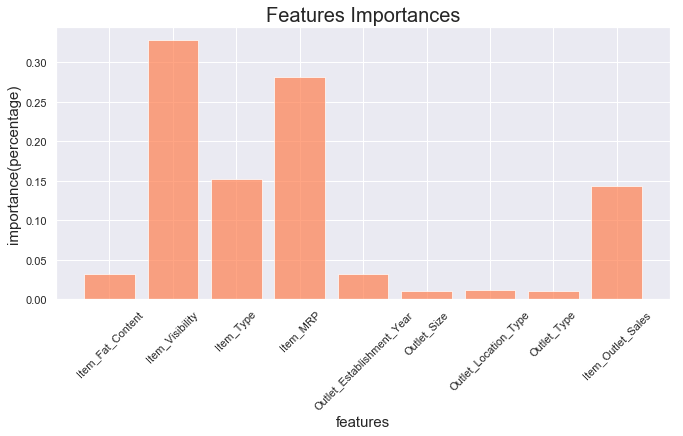

In [267]:
sns.set()
fig,ax=plt.subplots(figsize=(11,5))
plt.bar(features,importance,alpha=0.7,color='coral')
ax.set_xticklabels(features,rotation=45)
ax.set_xlabel('features',fontsize=15)
ax.set_ylabel('importance(percentage)',fontsize=15)
ax.set_title('Features Importances',fontsize=20)

In [268]:
data_null=data_null.drop(['Item_Identifier','Item_Weight','Outlet_Identifier'],axis=1)
#store the indicies with missing values
data_null_index=data_null.index
#predict the values with our random forest model
predict=rf.predict(data_null)
#assign them to the null values 
data.iloc[data_null_index,1]=predict

In [269]:
# double check wether we have removed all the missing values in every feature
data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [330]:
# Assigin the finding results to original data(train)
train.Outlet_Size=data.Outlet_Size
train.Outlet_Size=train.Outlet_Size.map(lambda x: 'small' if x==0 else 'medium' if x==1 else 'high')
train.Outlet_Size=train.Outlet_Size.astype('category')
train.Item_Weight=data.Item_Weight

### Chapter 4 Detailed Investigation on Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null category
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 740.9+ KB


In [275]:
#Finding out the correlation with Item_Outlet_Sales
result=data.corr()['Item_Outlet_Sales']
print('Correlation with Item_Outlet_Sales')
print('-'*100)
#Sort the results in a descedning order
result=result.sort_values(ascending=False)
display(result)
result_columns=result.index
data=data.loc[:,result_columns]

Correlation with Item_Outlet_Sales
----------------------------------------------------------------------------------------------------


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Size                  0.162753
Outlet_Location_Type         0.089367
Item_Weight                  0.017624
Item_Fat_Content             0.011993
Outlet_Type                  0.005331
Item_Type                   -0.007849
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

### 4.1 MRP 

We are not given any information of what MRP stands for. However, one thing for sure is that there is an incresing trend of Sales as MRP rises. I wish the description of it were provied for the better analysis. One outstanding feature we could curiously see is that in some intervals observations are absent, thereby being grouped according to the specific range of MRP.  

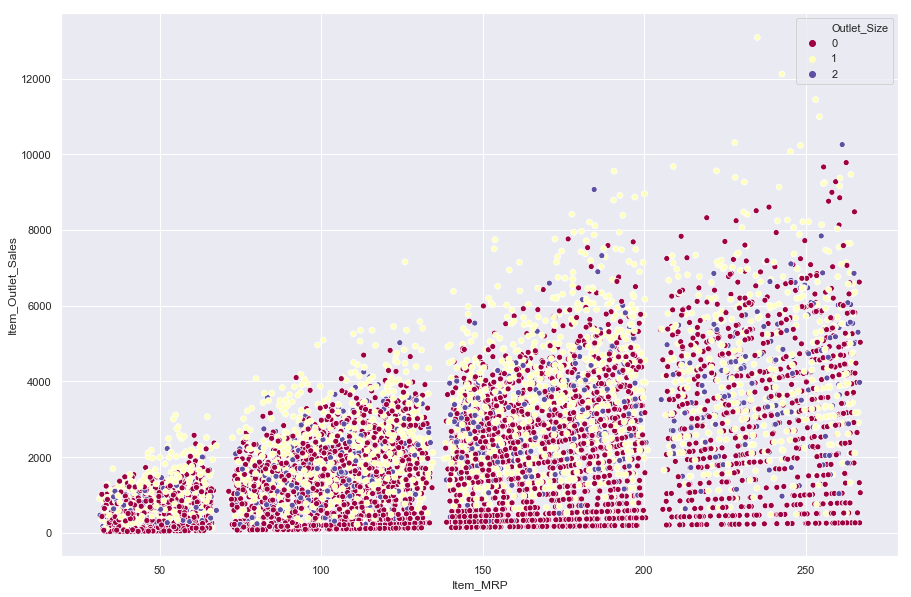

In [276]:
sns.set()
fig,axes=plt.subplots(figsize=(15,10))
sns.scatterplot(x=data.Item_MRP,y=data.iloc[:,0],ax=axes,hue=data.Outlet_Size,palette='Spectral')


### 4.2 Item_Weight and Item_Visibility

Normally, a lower correlation with the target variable is not into our consideration and we should drop the features before constructing a predicting model. However, before permanently discarding them, I always combine two varaibles to see if we can get some benefits from this interaction. 

I guess a sound guess that the heavier items become, the greater visible they are to consumers. With common sense, the heavier items should have a bigger size proportionally. Let's take some experiments in combing two varialbes by either multiplication or division.

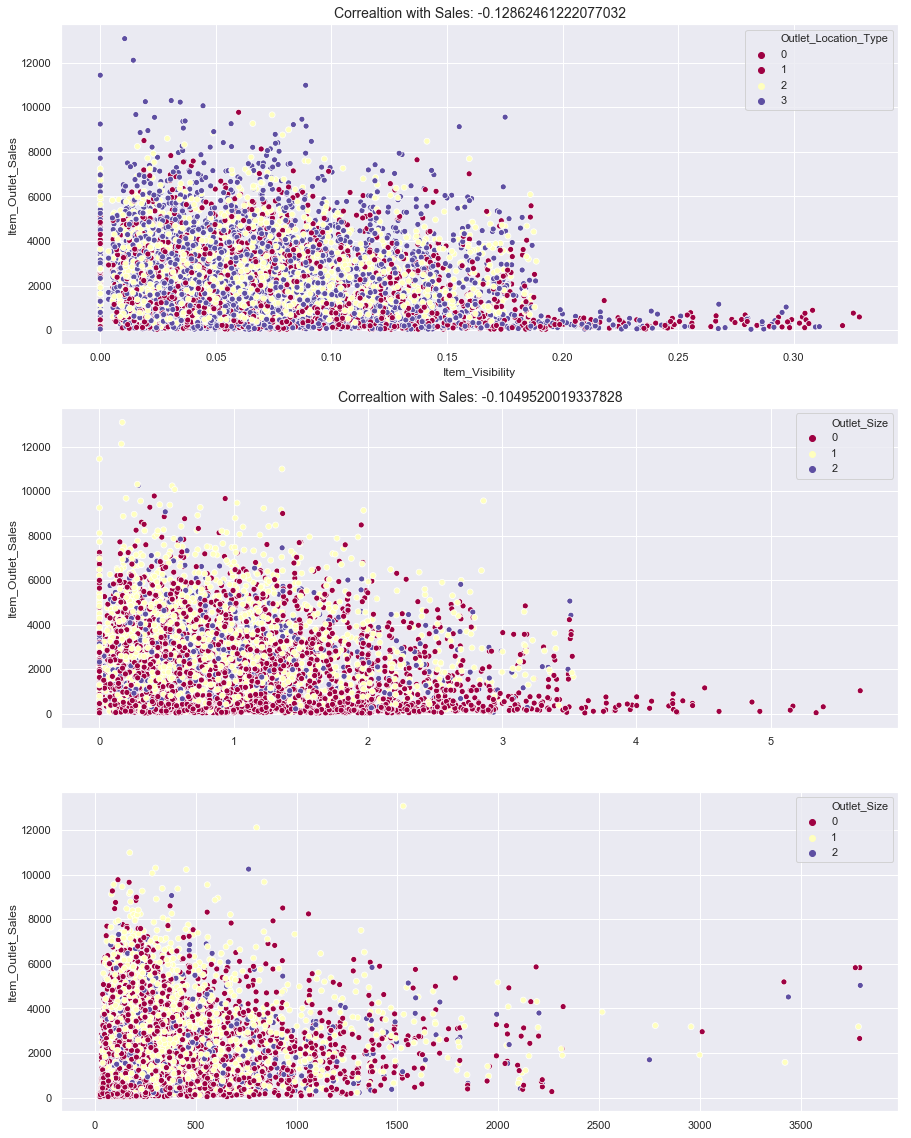

In [277]:
fig,ax=plt.subplots(3,1,figsize=(15,20))
weight_vis=data.Item_Weight*data.Item_Visibility
weight_by_vis=data.Item_Weight/data.Item_Visibility
sns.scatterplot(x=data.Item_Visibility,y=data.iloc[:,0],ax=ax[0],hue=data.Outlet_Location_Type,palette='Spectral')
ax[0].set_title('Correaltion with Sales: {0}'.format(data.Item_Outlet_Sales.corr(data.Item_Visibility)),fontsize=14)
sns.scatterplot(x=weight_vis,y=data.Item_Outlet_Sales,hue=data.Outlet_Size,palette='Spectral',ax=ax[1])
ax[1].set_title('Correaltion with Sales: {0}'.format(data.Item_Outlet_Sales.corr(weight_vis)),fontsize=14)
sns.scatterplot(x=weight_by_vis,y=data.iloc[:,0],hue=data.Outlet_Size,palette='Spectral',ax=ax[2])


The interaction between the two features does not help to improve the correlation. But, the scatter plots give some clues of which points are to be removed. In fact, this has correctly identified outliers a single feature failed to detect.

### Removing Outliers

In [279]:
#remove the outliers
data=data[data.Item_Weight*data.Item_Visibility<4.7]
data=data[data.Item_Weight/data.Item_Visibility<2500]
data=data[data.Item_Outlet_Sales<12000]


### 4.3 Item Weight and Fat content

Take another interesting experiment before building a predicting model. Why not we think there is a close relation between Item weight and fat content?  I have done the same procedure I did in the previous chapter. 
The result is still disappointing even though a slight improvement over the correlation exists.  We are not seeing any outliers since we have removed a majority of them in the previous steps. 


Text(2.5, 11000, 'Correaltion:0.0007828279423631214')

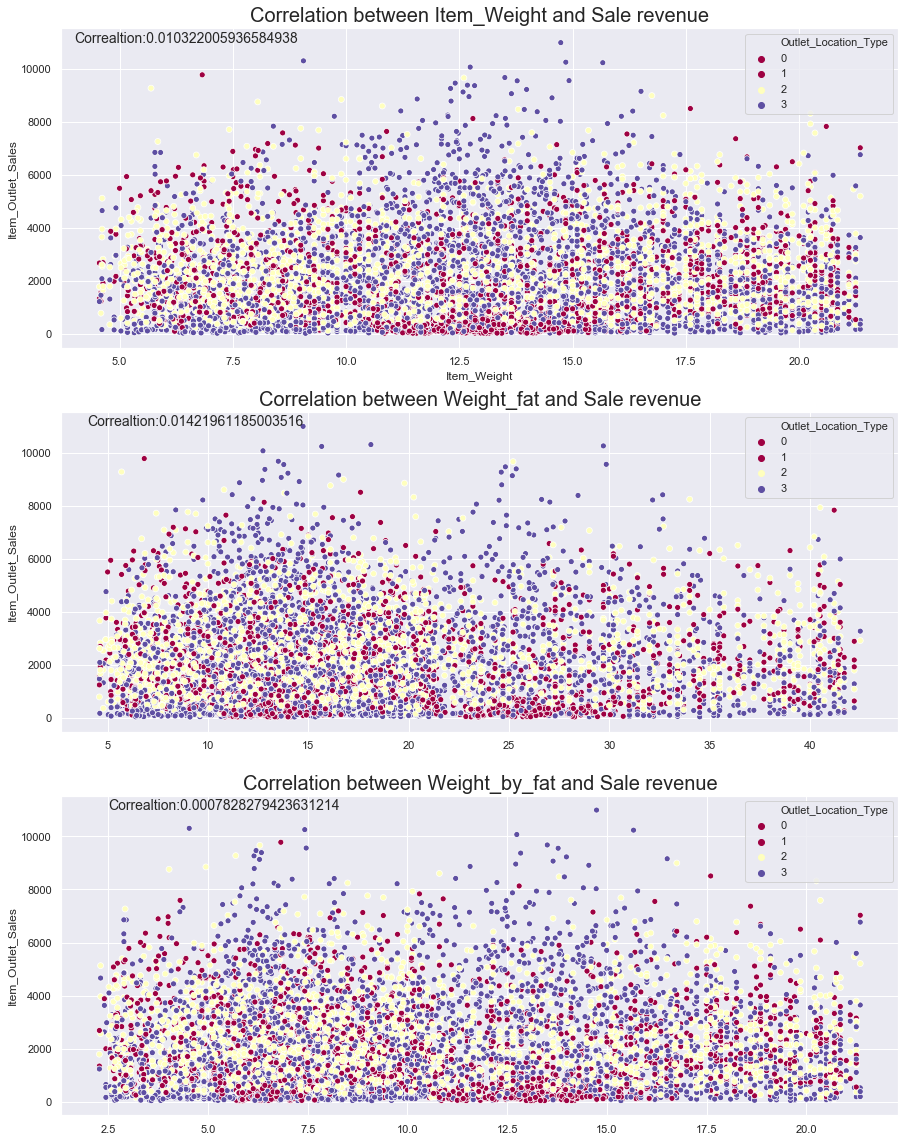

In [176]:
fig,ax=plt.subplots(3,1,figsize=(15,20))
weight_fat=data.Item_Weight*data.Item_Fat_Content
weight_by_fat=data.Item_Weight/data.Item_Fat_Content
sns.scatterplot(x=data.Item_Weight,y=data.iloc[:,0],ax=ax[0],hue=data.Outlet_Location_Type,palette='Spectral')
ax[0].set_title('Correlation between Item_Weight and Sale revenue',fontsize=20)
ax[0].text(x=4,y=11000,s='Correaltion:{0}'.format(data.Item_Outlet_Sales.corr(data.Item_Weight)),fontsize=14)
sns.scatterplot(x=weight_fat,y=data.iloc[:,0],ax=ax[1],hue=data.Outlet_Location_Type,palette='Spectral')
ax[1].set_title('Correlation between Weight_fat and Sale revenue',fontsize=20)
ax[1].text(x=4,y=11000,s='Correaltion:{0}'.format(data.Item_Outlet_Sales.corr(weight_fat)),fontsize=14)
data.Item_Outlet_Sales.corr(weight_vis)
sns.scatterplot(x=weight_by_fat,y=data.iloc[:,0],ax=ax[2],hue=data.Outlet_Location_Type,palette='Spectral')
ax[2].set_title('Correlation between Weight_by_fat and Sale revenue',fontsize=20)
ax[2].text(x=2.5,y=11000,s='Correaltion:{0}'.format(data.Item_Outlet_Sales.corr(weight_by_fat)),fontsize=14)


### 4.4 Other Features

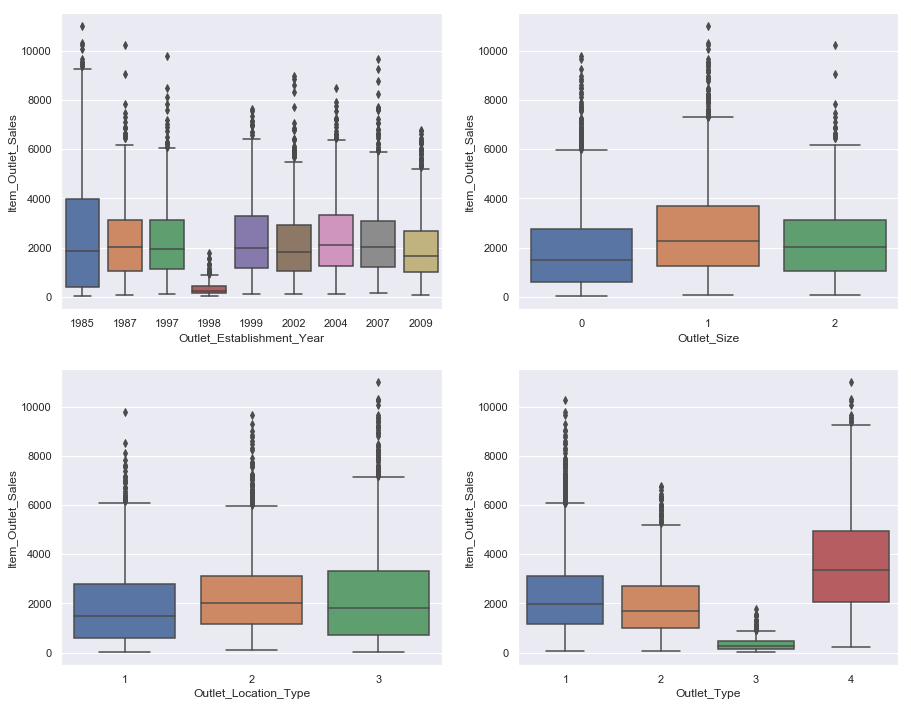

In [177]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=data)

### 4.4 Conclusion
Two continuous columns demonstrate a much lower correlation with the target variable than what is normally accepted. Therefore, I decied to drop these two continuous features. 

In [310]:
#data=data.drop(['Item_Weight','Item_Visibility'],axis=1)
y=data.Item_Outlet_Sales
X=data.iloc[:,1:]
X.iloc[:,1:6]=X.iloc[:,1:6].astype('category')



## 5. Constructing Mode

In [356]:
# Preparing the data sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### 5.1 Simple Linear Regression (Base Line)

In [312]:
#Train the model 
sl=LinearRegression()
sl.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [313]:
#predict the taraget variable based on X_test
predict_sl=sl.predict(X_test)
#Calculate Mean Squared Error
mse=np.mean((predict_sl-y_test)**2)
#Score
sl_score=np.sqrt(mse)
print('Score of Simple regrssion model : {0}'.format(sl_score))

Score of Simple regrssion model : 1354.4947760250934


### 5.2 Rigid Regression

In [314]:
r=Ridge(alpha=0.5,solver='cholesky')
r.fit(X_train,y_train)
predict_r=r.predict(X_test)
mse=np.mean((predict_r-y_test)**2)
r_score=np.sqrt(mse)
r_score
print('Score of Rigid Regression : {0}'.format(sl_score))

Score of Rigid Regression : 1354.4947760250934


### 5.3 Lasso

In [315]:
l=Lasso(alpha=0.01)
l.fit(X_train,y_train)
predict_r=r.predict(X_test)
mse=np.mean((predict_r-y_test)**2)
l_score=np.sqrt(mse)
l_score
print('Score of Lasso : {0}'.format(l_score))

Score of Lasso : 1354.4945285715414


### 5.4 Elastic Net

In [316]:
en=ElasticNet(alpha=0.01)
en.fit(X_train,y_train)
predict_r=en.predict(X_test)
mse=np.mean((predict_r-y_test)**2)
l_score=np.sqrt(mse)
l_score
print('Score of Elastic Net: {0}'.format(l_score))

Score of Elastic Net: 1354.4830009411783


### 5.5 Support Vector Machine 

In [317]:
svm=SVR(epsilon=15,kernel='linear')
svm.fit(X_train,y_train)
predict_r=svm.predict(X_test)
mse=np.mean((predict_r-y_test)**2)
l_score=np.sqrt(mse)
l_score
print('Score of Sotchastic Gradient: {0}'.format(l_score))

Score of Sotchastic Gradient: 1376.3283415281476


### 5.6 Decision Tree

In [318]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predict_r=dtr.predict(X_test)
mse=np.mean((predict_r-y_test)**2)
l_score=np.sqrt(mse)
l_score

1569.1164753421035

### 5.8 Comments 



No alternative models could beat the base model(multi regression model). Therefore,we will look at model to see if the further evelation steps are needed. Unfortunately, the adjusted R-squareds is really lower than what I expcet it to be. Thefore, I close my remark saying 
that the data iteself is not sutiable for predicing the Item_Outlet Sales

In [352]:
y=train.Item_Outlet_Sales
X=train.iloc[:,[2,4,5,7,8,9,10]]
columns=['Item_MRP',
         'Item_Fat_Content',
         'Item_Type',
         'Outlet_Size',
         'Outlet_Location_Type',
         'Outlet_Type',
        'Outlet_Establishment_Year']
#rearrange the columns
X=pd.DataFrame(X,columns=columns)
#All the object varibles are converted into categories one
print(X.head())
X.iloc[:,1:]=X.iloc[:,1:7].astype('category')
X=pd.get_dummies(X)
#Create a OLS model
model=sm.OLS(y,X)
results=model.fit()

   Item_MRP Item_Fat_Content              Item_Type Outlet_Size  \
0  249.8092          Low Fat                  Dairy      medium   
1   48.2692          Regular            Soft Drinks      medium   
2  141.6180          Low Fat                   Meat      medium   
3  182.0950          Regular  Fruits and Vegetables        high   
4   53.8614          Low Fat              Household        high   

  Outlet_Location_Type        Outlet_Type  Outlet_Establishment_Year  
0               Tier 1  Supermarket Type1                       1999  
1               Tier 3  Supermarket Type2                       2009  
2               Tier 1  Supermarket Type1                       1999  
3               Tier 3      Grocery Store                       1998  
4               Tier 3  Supermarket Type1                       1987  


In [353]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     354.1
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:15:21   Log-Likelihood:                -71987.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8491   BIC:                         1.443e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_MRP                           15.5645      0.198     78.729      0.000      15.177      15.952
Item_Fat_Content_LF               -67.0056     59.101     -1.134      0.257    -182.858      48.847
Item_Fat_Content_Low Fat          -32.2990     31.840     -1.014      0.310     -94.712      30.114
Item_Fat_Content_Regular           10.1644     34.216      0.297      0.766     -56.908      77.237
Item_Fat_Content_low fat           11.7706     91.342      0.129      0.897    -167.283     190.824
Item_Fat_Content_reg              -91.7198     89.866     -1.021      0.307    -267.879      84.439
Item_Type_Baking Goods            -16.4665     45.090     -0.365      0.715    -104.855      71.921
Item_Type_Breads                  -11.5884     69.025     -0.168      0.867    -146.895     123.718
Item_Type_Breakfast               -11.6642    102.794     -0.113      0.910    -213.165     189.836
Item_Type_Canned                    9.7232     45.041      0.216      0.829     -78.568      98.014
Item_Type_Dairy                   -59.6963     44.025     -1.356      0.175    -145.996      26.603
Item_Type_Frozen Foods            -43.3362     40.122     -1.080      0.280    -121.986      35.313
Item_Type_Fruits and Vegetables    12.7451     34.832      0.366      0.714     -55.534      81.024
Item_Type_Hard Drinks             -19.0671     75.013     -0.254      0.799    -166.112     127.977
Item_Type_Health and Hygiene      -23.4277     50.356     -0.465      0.642    -122.137      75.282
Item_Type_Household               -53.8362     40.236     -1.338      0.181    -132.708      25.036
Item_Type_Meat                    -14.5554     54.614     -0.267      0.790    -121.612      92.501
Item_Type_Others                  -35.6278     83.800     -0.425      0.671    -199.897     128.642
Item_Type_Seafood                 165.5220    133.563      1.239      0.215     -96.294     427.338
Item_Type_Snack Foods             -27.3942     35.046     -0.782      0.434     -96.092      41.304
Item_Type_Soft Drinks             -43.7188     53.207     -0.822      0.411    -148.017      60.580
Item_Type_Starchy Foods             3.2991     88.898      0.037      0.970    -170.963     177.561
Outlet_Size_high                  -10.6550     41.026     -0.260      0.795     -91.076      69.766
Outlet_Size_medium                -67.0851     63.062     -1.064      0.287    -190.701      56.531
Outlet_Size_small                 -91.3494     51.549     -1.772      0.076    -192.398       9.700
Outlet_Location_Type_Tier 1      -380.6052     19.223    -19.799      0.000    -418.287    -342.923
Outlet_Location_Type_Tier 2       -20.1409     32.352     -0.623      0.534     -83.558      43.276
Outlet_Location_Type_Tier 3       231.6566     29.278      7.912      0.000     174